**Importing required libraries**

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from sklearn.cluster import KMeans

**Loading the Dataset**

In [137]:
data = datasets.load_iris()
df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target
# replacing label classes with numerical value
df['label'] = df.target.replace(dict(enumerate(data.target_names)))

In [177]:
# prints the first 10 rows in the dataframe
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,label
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


**Checking the correlation between each feature**

Text(0.5, 1.0, 'Correlation of iris classes')

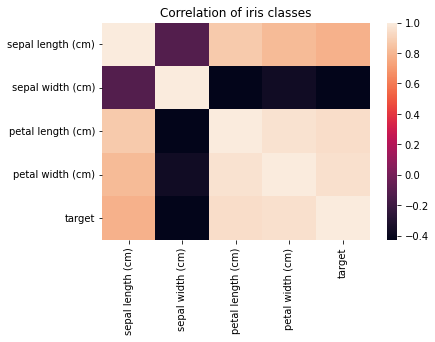

In [139]:
# shows correlation between and all features
plt.figure(1)
sns.heatmap(df.corr())
plt.title("Correlation of iris classes") 

In [140]:
# statistical summary for the given dataset
df.describe() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [141]:
# Checking for null values
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
label                0
dtype: int64

In [142]:
# Removing duplicates
df = df.drop_duplicates()

In [143]:
# Distribution of each class is found
df.value_counts('label')

label
versicolor    50
setosa        50
virginica     49
dtype: int64

"The plot below shows that 'Setosa' has smaller petal length and petal width\nThe 'Versicolor' lies in the middle with petal length(3 - 5 cm) and petal width (1 - 1.5 cm)\nThe 'Viginica' has larger petal length and petal width\n"

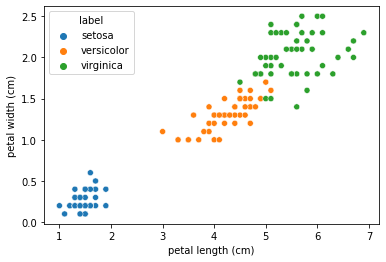

In [144]:
''' Comparing petal length with petal width '''
sns.scatterplot(x = 'petal length (cm)', y = 'petal width (cm)', hue = 'label', data = df)
'''The plot below shows that 'Setosa' has smaller petal length and petal width
The 'Versicolor' lies in the middle with petal length(3 - 5 cm) and petal width (1 - 1.5 cm)
The 'Viginica' has larger petal length and petal width
'''

"The plot below shows that 'Setosa' has lower sepal length but higher sepal width\nIts harder to comment about the other species\n"

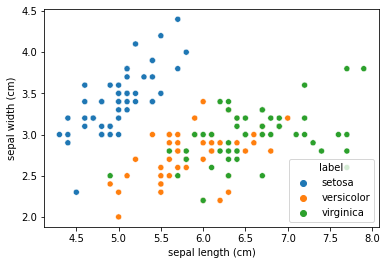

In [145]:
''' Comparing sepal length with sepal width '''
sns.scatterplot(x = 'sepal length (cm)', y = 'sepal width (cm)', hue = 'label', data = df )
'''The plot below shows that 'Setosa' has lower sepal length but higher sepal width
Its harder to comment about the other species
'''

**Using GMM to separate the clusters using all 4 features**

In [165]:
# GMM is imported
from sklearn.mixture import GaussianMixture

# the model is fit with the iris dataset
gm = GaussianMixture(3, random_state = 1).fit(data.data)

# predict method is called with dataset
gm_cluster = gm.predict(data.data)

# prints gm_cluster
print(gm_cluster)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 0 2
 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [166]:
# Report value of np.sum(y_pred==y) / len(y_pred)
print(np.sum(gm_cluster) / len(gm_cluster))

0.9333333333333333


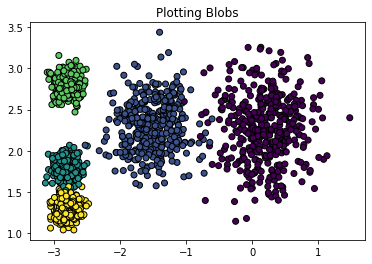

In [168]:
# make_blobs is imported
from sklearn.datasets import make_blobs

# Values of the parameters are set
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

# generating blobs
X, y = make_blobs(n_samples = 2000, centers = blob_centers, cluster_std = blob_std)


# Plotting blobs
plt.figure(1)
plt.title("Plotting Blobs")
plt.scatter(X[:,0], X[:,1], c = y, edgecolor = 'k')

# Showing the plot
plt.show()

**K-Means clustering**

In [169]:
from sklearn.cluster import KMeans

In [170]:
# training k-means to train on this dataset
kmeans = KMeans(5)
y_pred = kmeans.fit_predict(X)

In [171]:
# Printing values of centroid
print("Centroid values: ")
print(kmeans.cluster_centers_)

Centroid values: 
[[-2.80497198  1.30471148]
 [-1.48227869  2.29875792]
 [ 0.21472882  2.26942721]
 [-2.79844179  2.79369933]
 [-2.79554235  1.80300259]]


In [172]:
# X_new Test set is declared
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])

# Predicting with X_new
kmeans.predict(X_new)

array([2, 2, 3, 3], dtype=int32)

<Figure size 432x288 with 0 Axes>

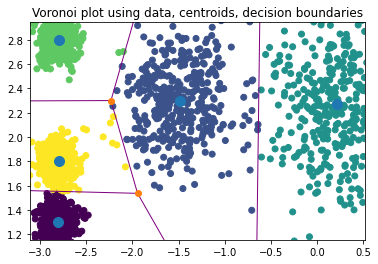

In [173]:
# importing libraries for vornoi
from scipy.spatial import Voronoi, voronoi_plot_2d

val = kmeans.cluster_centers_

# Plotting using Voronoi 
voronoi = Voronoi(val)
plt.figure(1)
voronoi_plot_2d(voronoi, line_colors='purple', point_size = 20)
plt.title("Voronoi plot using data, centroids, decision boundaries")
plt.scatter(X[:,0], X[:,1], c = kmeans.labels_)

# displaying the plot
plt.show()

In [174]:
# The value of K is set to 3
kmeans_3 = KMeans(3)
y_pred_3 = kmeans_3.fit_predict(X)

# Printing values of centroid when K = 3
print("Centroid values when K = 3: ")
print(kmeans_3.cluster_centers_)

Centroid values when K = 3: 
[[-2.1900089   2.55736009]
 [ 0.14766325  2.26323372]
 [-2.80285839  1.55246954]]


In [175]:
# The value of K is set to 8
kmeans_8 = KMeans(8)
y_pred_8 = kmeans_8.fit_predict(X)

# Printing values of centroid when K = 8
print("Centroid values when K = 8: ")
print(kmeans_8.cluster_centers_)

Centroid values when K = 8: 
[[-2.80497198  1.30471148]
 [ 0.07712767  1.85731924]
 [-2.80018272  2.79392601]
 [-1.71317481  2.18272424]
 [ 0.5897612   2.3478273 ]
 [-1.25757194  2.42672942]
 [-2.80317962  1.8007378 ]
 [-0.0113229   2.58528663]]


Inertia when K = 3 :  634.606726856782
Inertia when K = 5 :  214.3741484421692
Inertia when K = 8:  125.1376156056921

Values of inertia when K = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] :
 [3512.6332288717017, 1138.2690008468387, 634.606726856782, 264.26464932438427, 214.37681898442708, 174.2692677731677, 147.26740483176485, 125.2122293557486, 109.68571448024501, 98.72045688792772]

Result: With the help of the inertia calculated, we can observe that inertia decreases with increase in the value of K. 
The decrease is steep when the value of K is small and the steepness gradually decreases


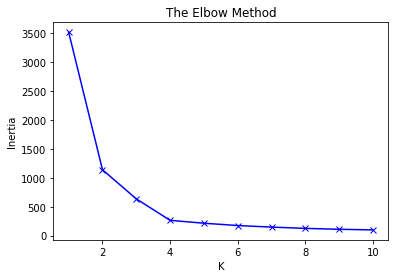

From the graph, it is evident that the optimal elbow value for K is 4.
The value of inertia after K = 4 does not change a lot.


In [182]:
# Print values of inertia when K = 3, K = 5 and K = 8
print("Inertia when K = 3 : ", kmeans_3.inertia_)
print("Inertia when K = 5 : ", kmeans.inertia_)
print("Inertia when K = 8: ", kmeans_8.inertia_)

# plotting the inertia as a function of k
num_clusters = []
inertia = []
for i in range(1,11):
  kmeans_iter = KMeans(i)
  kmeans_iter.fit(X)
  num_clusters.append(i)
  inertia.append(kmeans_iter.inertia_)
 
# printing the values of inertia
print("\nValues of inertia when K =", num_clusters, ":\n",inertia)
print("\nResult: With the help of the inertia calculated, we can observe that inertia decreases with increase in the value of K. \nThe decrease is steep when the value of K is small and the steepness gradually decreases")

# Elbow method
plt.figure(1)
plt.plot(num_clusters, inertia, 'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.title('The Elbow Method')
plt.show()


print("From the graph, it is evident that the optimal elbow value for K is 4.")
print("The value of inertia after K = 4 does not change a lot.")